# **Experiment Notebook - XGBoostClassifier**



## Case Study: 
Phoenix - Financial Transaction Fraud Detection

## Objective: 
Identify fraudulent financial transactions using machine learning techniques to protect the bank’s assets and customers

## Background: 
In the bustling city of Metropolis, the prestigious Phoenix Bank has been a pillar of financial stability for decades. However, a recent surge in fraudulent transactions has put the bank on high alert. The bank’s security team has uncovered a sophisticated fraud ring targeting their customers. The bank’s CEO has tasked the data science team with developing a robust fraud detection model to thwart these cybercriminals and safeguard the bank’s reputation.

## Dataset Overview: 
The dataset contains financial transactions made by Phoenix Bank customers over a 2-day period and 284,807 transactions, of which 492 are identified as fraudulent, which translates to a fraud rate of 0.17%.

## Features:
    •	Time: The number of seconds elapsed between each transaction and the first transaction in the dataset.
    •	Amount: The amount of the transaction, which can be used for cost-sensitive learning.
    •	Feature1, Feature2, …, Feature28: Principal components obtained through PCA (Principal Component Analysis).
    •	Class: The response variable, where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.

## Tasks Needed:
    1.	Exploratory Data Analysis (EDA):
        o	Analyze the distribution of the features.
        o	Identify any patterns or anomalies in the data.
        o	Visualize the data to understand the relationships between different features.
    2.	Data Preprocessing:
        o	Handle missing values, if any.
        o	Scale and preprocess the features if necessary.
    3.	Model Building:
        o	Split the data into training and testing sets.
        o	Train multiple models (e.g., Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, etc.).
        o	Evaluate the models using appropriate metrics (e.g., Precision, Recall, F1-Score, ROC-AUC).
    4.	Model Evaluation and Selection:
        o	Compare the performance of different models.
        o	Select the best model based on evaluation metrics.
        o	Discuss the trade-offs between different models.
    5.	Presentation: At minimum, 
        o	Prepare a PowerPoint presentation summarizing the findings from the EDA.
        o	Explain the preprocessing steps and the rationale behind them.
        o	Discuss the model building process and the performance of each model.
        o	Justify the selection of the final model.

## Experiment:
This notebook removes duplicates.

### 1. Load the dataset

In [1]:
# load modules
%load_ext autoreload
%autoreload 2

In [2]:
# data libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# filter warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data
df_explore = pd.read_csv('../data/raw/Case Study_Transaction_Fraud data.csv')

### 2. Explore the datasets

#### 2.1 Exploration

In [4]:
df_explore.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print('Dataset shape: ', df_explore.shape)

Dataset shape:  (284807, 31)


In [6]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df_explore.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
len(df_explore[df_explore['Amount'] == 0])

1825

Although there are 1,825 transactions with 0 amount, we will retain them. We will assume that these are zero-value authorization transactions.

Zero-Value Authorization, also known as zero-amount authorization or pre-authorization, is a practice in electronic payments where a nominal or zero-value transaction is temporarily processed to verify the validity of a payment card before the actual purchase or service usage.

In [9]:
df_explore[df_explore.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [10]:
df_explore[df_explore['Time'] == 26]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0


There are 1,081 counts of duplicate records. Will retain for now. There are instances of fraud based from duplicate transactions. We can create a new feature that indicates this.

In [11]:
# df_explore['is_duplicate'] = df_explore.duplicated().astype('int')
df_explore = df_explore[~df_explore.duplicated()]

In [12]:
df_explore.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 2.2 Preprocessing

In [13]:
# category columns
# cat_cols = ['is_duplicate']

# cols to drop
# drop_cols = ['Time']

In [14]:
# df_explore.drop(drop_cols, axis=1, inplace=True)

In [15]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

### 3. Explore Target variable

In [16]:
target = 'Class'

In [17]:
df_explore[target].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [18]:
df_explore[target].value_counts(normalize=True)

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

<Axes: xlabel='Class', ylabel='count'>

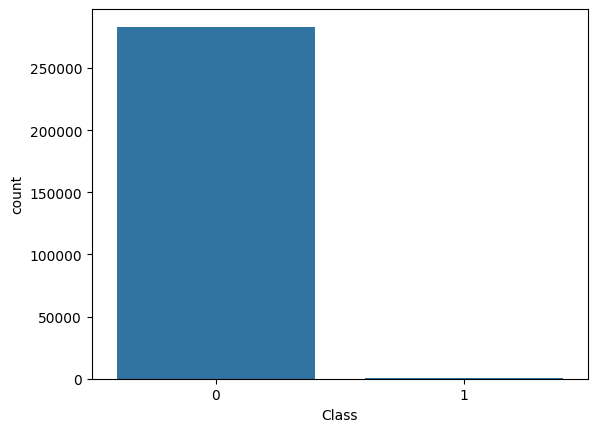

In [19]:
sns.countplot(x=target, data=df_explore, order=df_explore[target].value_counts(ascending=False).index)

### 4. Explore Features

#### Categorical Features v Target

In [20]:
# def plot_categ_feats(feat, df, target, th):
#     fig, ax = plt.subplots(1,2,figsize=(10,5))
#     ax = ax.flatten()
    
#     df_counts = df.groupby([feat, target]).size().reset_index(name='counts')
#     df_pivot = df_counts.pivot_table(index=feat ,columns=target, aggfunc='sum', fill_value=0, margins=True)
#     df_pcnt = df_pivot.div(df_pivot.iloc[:,-1], axis=0)
    
#     value_filter = df_pcnt[('counts',1)] >= th
#     df_pcnt_filtered = df_pcnt[value_filter].loc[:,('counts',1)].sort_values(ascending=False).drop('All')
#     sns.barplot(x=df_pcnt_filtered.index,y=df_pcnt_filtered.values, color='orange',ax=ax[0])
    
#     df_cnts_filtered = df[feat].value_counts(ascending=False).filter(items = df_pcnt[value_filter].index).reindex(df_pcnt_filtered.index)
#     sns.barplot(x=df_cnts_filtered.index,y=df_cnts_filtered.values, color='gray', ax=ax[1])
    
#     ax[0].tick_params(axis='x', labelrotation=50)
#     ax[1].tick_params(axis='x', labelrotation=50)
    
#     ax[0].set_title('Pcnt of fraud per ' + feat)
#     ax[1].set_title('Number of fraud per ' + feat)
#     plt.show()

#     return df_cnts_filtered

In [21]:
## [Feature Exploration]
## Exploring feature conference and its relation to the target
# hello = plot_categ_feats('is_duplicate', df_explore, target, 0)

#### Numerical Features v Target

In [22]:
num_cols = [x for x in df_explore.columns if x not in [target]]

In [23]:
len(num_cols)

30

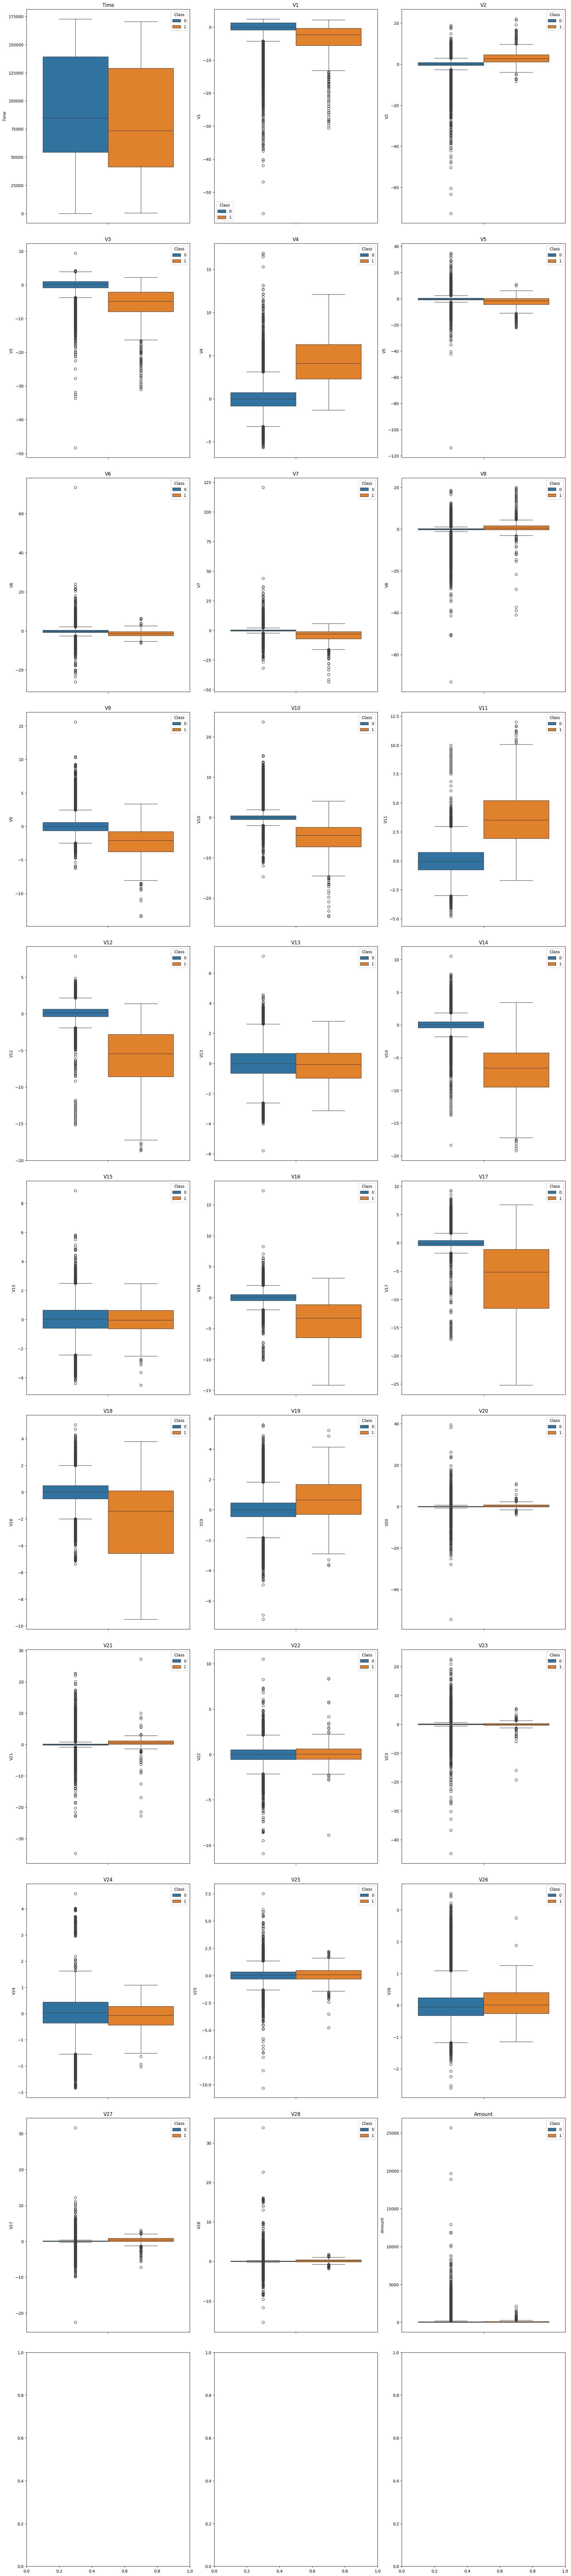

In [24]:
fig, ax = plt.subplots(int(len(num_cols)/3)+1, 3, figsize=(20,90))
ax = ax.flatten()
plt.tight_layout(pad=3)

for idx,col in enumerate(num_cols):
    sns.boxplot(y=col, hue=target, data=df_explore, ax=ax[idx])
    ax[idx].set_title(col)

plt.show()

From the box plot distributions, it seems that Time, V13, V15, V22, V24-28 have similar distributions between fraud and non fraud transactions. For initial runs, it would be logical to retain them. Also possible to explore Mann-Whitney U test to test for group similarities.

#### Mann-Whitney U test

In [25]:
import scipy.stats as stats

In [26]:
# test
th = 0.05
for col in num_cols:
    res = 'fail to reject'
    pval = stats.mannwhitneyu(df_explore[df_explore[target] == 0][col], df_explore[df_explore[target] == 1][col], alternative='two-sided')[1]
    if pval < th:
        res = 'reject'
    print(f'The pvalue for {col} is {pval}. We {res} the null.')

The pvalue for Time is 2.2333299415120161e-10. We reject the null.
The pvalue for V1 is 2.570801236736305e-105. We reject the null.
The pvalue for V2 is 8.27456173131813e-153. We reject the null.
The pvalue for V3 is 8.73865641883307e-208. We reject the null.
The pvalue for V4 is 1.5992207470091923e-236. We reject the null.
The pvalue for V5 is 2.8300422665548195e-51. We reject the null.
The pvalue for V6 is 5.34406218307445e-91. We reject the null.
The pvalue for V7 is 6.513087124630184e-136. We reject the null.
The pvalue for V8 is 2.3688203485976863e-34. We reject the null.
The pvalue for V9 is 1.4836338386706985e-145. We reject the null.
The pvalue for V10 is 9.598036358821476e-210. We reject the null.
The pvalue for V11 is 4.678414391392784e-214. We reject the null.
The pvalue for V12 is 1.358343782132312e-234. We reject the null.
The pvalue for V13 is 0.0974262090153798. We fail to reject the null.
The pvalue for V14 is 2.304859049719335e-248. We reject the null.
The pvalue for V

Based on the test, we can consider removing V13, V15, and V22.

### 5. Data Preparation

In [27]:
# # create dummy variables and concat
# dummies_df = []
# for var in cat_cols:
#     dummies_df.append(pd.get_dummies(df_explore[var], drop_first=True, prefix=var, dtype=float))

# df = pd.concat([df_explore, pd.concat(dummies_df, axis=1)], axis=1)
# df.drop(cat_cols, axis=1, inplace=True)

In [28]:
df = df_explore.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

### 6. Splitting Dataset

In [30]:
X = df_explore.drop(target, axis=1)
y = df_explore[target]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

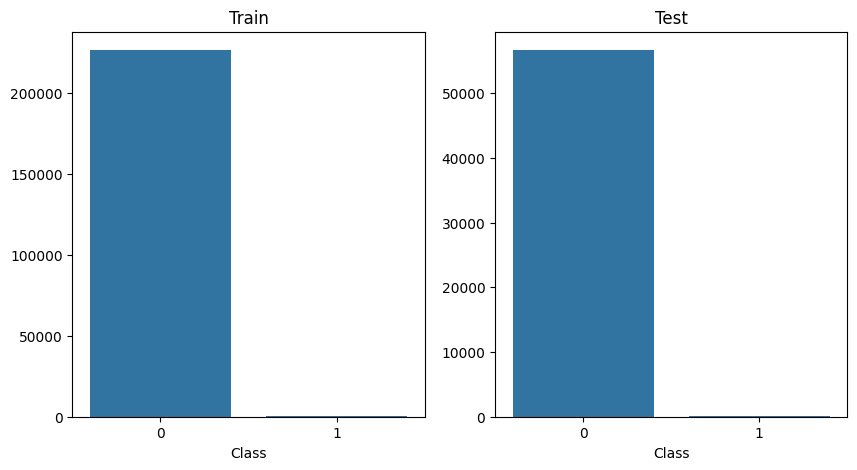

In [32]:
# checking distributions of the resulting train, and test sets
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax = ax.flatten()

y_train_cnts = y_train.value_counts()
y_test_cnts = y_test.value_counts()

sns.barplot(x=y_train_cnts.index, y=y_train_cnts.values, ax=ax[0])
sns.barplot(x=y_test_cnts.index, y=y_test_cnts.values, ax=ax[1])

ax[0].set_title('Train')
ax[1].set_title('Test')

plt.show()

In [33]:
y_train_cnts

Class
0    226602
1       378
Name: count, dtype: int64

In [34]:
y_test_cnts

Class
0    56651
1       95
Name: count, dtype: int64

### 7. Baseline Model

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, \
    average_precision_score, precision_recall_curve, PrecisionRecallDisplay

In [36]:
# creating baseline predictions with the same shape as the train set
train_baseline_preds = np.full(y_train.shape, y_train.mode())

In [37]:
def display_classifier_scores(y_actuals, y_preds):
    """Evaluating accuracy, precision, recall, and F1

    Parameters
    ----------
    y_preds : Numpy Array
        Predicted target
    y_actuals : Numpy Array
        Actual target

    Returns
    -------
    Display everything onto a dataframe
    """

    dict_eval_metrics = {'accuracy': accuracy_score,
                 'precision': precision_score,
                 'recall': recall_score,
                 'f1': f1_score,
                }

    list_scores = [scorer(y_actuals, y_preds) for scorer in dict_eval_metrics.values()]
    display(pd.DataFrame(list_scores, index=dict_eval_metrics.keys(), columns=['Results']))

In [38]:
# displaying typical classification metrics
display_classifier_scores(y_actuals=y_train, y_preds=train_baseline_preds)

,Results
accuracy,0.998335
precision,0.000000
recall,0.000000
f1,0.000000


In [39]:
def plot_confusion_matrix(y_actuals, y_preds):
    """Displaying confusion matrix

    Parameters
    ----------
    y_actuals : Numpy Array
        Actual target
    y_preds : Numpy Array
        Predicted target 

    Returns
    -------
    """
    cm = confusion_matrix(y_actuals, y_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

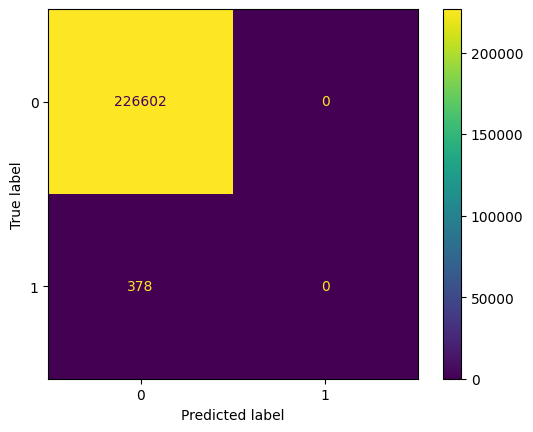

In [40]:
# plotting confusion matrix
plot_confusion_matrix(y_actuals=y_train, y_preds=train_baseline_preds)

Resulting to high accuracy scores, but scoring 0 on precision, recall, and F1 scores. This is expected since the majority class is 0 and the baseline model is predicting only 0.

### 8. Train Machine Learning Model

In [41]:
import xgboost as xgb

In [42]:
# choosing initial scale to account for imbalance (# of negative classes / # of positive classes)
scale_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

print('Scale class weight: ', scale_weight)

# initialize model
model = xgb.XGBClassifier(scale_pos_weight = scale_weight, eval_metric=average_precision_score, booster='gbtree', random_state=10)

Scale class weight:  599.4761904761905


### 9. Assess Model Performance

In [45]:
# KFold cross validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

# Doing 10 splits
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

dict_eval_metrics = {'accuracy': accuracy_score,
             'precision': precision_score,
             'recall': recall_score,
             'f1': f1_score,
             'average_precision': average_precision_score
            }

def evaluate_cv_predictions(X, y, model):
  """
  function to display mean, std, and median cross validation scores
  """
  fig, ax = plt.subplots(1,len(dict_eval_metrics), figsize = (20,5))
  plt.tight_layout(pad=2)
  ax = ax.flatten()

  score_list_mean = []
  score_list_std = []
  score_list_median = []

  for idx,key in enumerate(dict_eval_metrics.keys()):
    scores = cross_val_score(model, X, y, scoring=key, cv=cv, n_jobs=-1)

    sns.boxplot(scores, ax=ax[idx])
    ax[idx].set_title(key)

    score_list_mean.append(np.mean(scores))
    score_list_std.append(np.std(scores))
    score_list_median.append(np.median(scores))

  display(pd.DataFrame({'Mean':score_list_mean, 'STD':score_list_std, 'Median':score_list_median}, index=dict_eval_metrics.keys()))
  plt.show()

,Mean,STD,Median
accuracy,0.999520,0.000121,0.999559
precision,0.908357,0.060231,0.926840
recall,0.796515,0.049337,0.813300
f1,0.846814,0.037155,0.859440
average_precision,0.836992,0.033006,0.843194


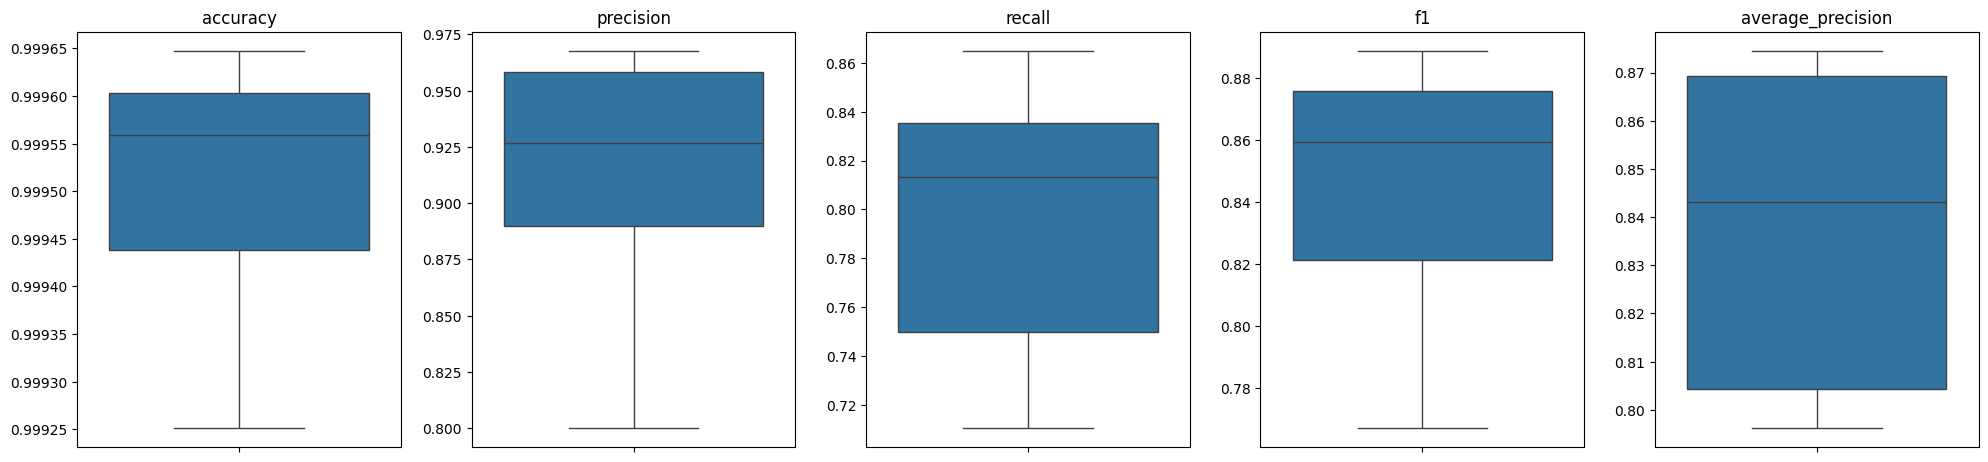

In [46]:
# scores for training
evaluate_cv_predictions(X_train, y_train, model)

Recall is the more important metric for this case. Business priority is to determine fraud, but also has leeway to raise false alarms (false positives).

In [47]:
# generate cross validation predictions for training data
y_cv_probs = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:,1]
y_cv_preds = (y_cv_probs >= 0.5).astype(int)

In [48]:
# checking pred values
print(y_cv_preds)

[0 0 0 ... 0 0 0]


In [49]:
# checking probability values
print(y_cv_probs)

[6.0988088e-05 2.0766853e-07 2.5355641e-07 ... 5.7107154e-05 2.7801018e-06
 3.1774053e-07]


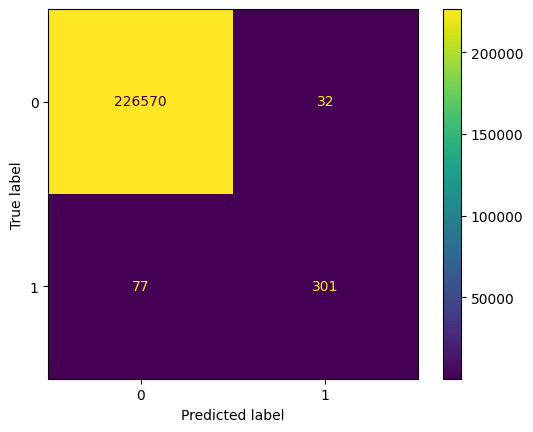

In [50]:
plot_confusion_matrix(y_actuals=y_train, y_preds=y_cv_preds)

The initial model has high recall, given that the initial scale was high. This is also a good sign given that the initial model is able to predict positive classes that are only less than 0.1% of the whole distribution.

In [51]:
def plot_prauc_curve(y_actuals, y_probs):
    """Displaying AUCPR Curve

    Parameters
    ----------
    y_actuals : Numpy Array
        Actual target
    y_probs : Numpy Array
        Predicted target probabilities

    Returns
    -------
    """
    print('AUCPR score: {:.4f}'.format(average_precision_score(y_actuals, y_probs)))

    prec, rec, _ = precision_recall_curve(y_actuals, y_probs)
    prauc_display = PrecisionRecallDisplay(precision=prec, recall=rec).plot()
    prauc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0.5, 0.5], color = 'g', linestyle='--')
    plt.show()

AUCPR score: 0.8356


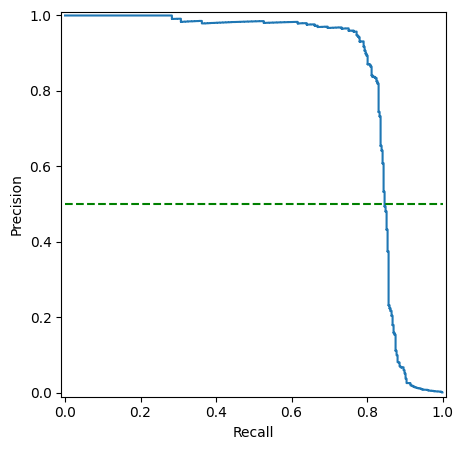

In [52]:
plot_prauc_curve(y_actuals=y_train, y_probs=y_cv_probs)

### 10. Hyperparameter Tuning

In [53]:
from hyperopt import fmin, tpe, hp, anneal, Trials

In [54]:
# defining optimisation function
def xgb_aucpr_cv(params, random_state=10, cv=cv, X=X_train, y=y_train):
    params = {
              'max_depth': int(params['max_depth']), 
             'scale_pos_weight': int(params['scale_pos_weight']),
             'learning_rate': np.log(params['learning_rate']),
             # 'subsample': np.log(params['subsample']),
             'reg_lambda': np.log(params['reg_lambda']),
             'reg_alpha': np.log(params['reg_alpha']),
             'min_child_weight': int(params['min_child_weight'])                          
    }
    
    model = xgb.XGBClassifier(eval_metric=average_precision_score, booster='gbtree', random_state=10, **params)
    
    score = -cross_val_score(model, X, y, cv=cv, scoring='average_precision', n_jobs=-1).mean()

    return score

In [55]:
%%time

n_iter=10 # limiting to ten iterations for resource purposes

# possible values of parameters
space = {
       'max_depth' : hp.quniform('max_depth', 5, 15, 1),
       'scale_pos_weight': hp.quniform('scale_pos_weight', 1, 1000, 1),
       'learning_rate': hp.loguniform('learning_rate', 1e-2, 1),
       # 'subsample': hp.loguniform('subsample', 0.7, 0.9),
       'reg_lambda': hp.loguniform('reg_lambda', 1e-1, 100),
       'reg_alpha': hp.loguniform('reg_alpha', 1e-1, 100),
       'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1) 
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=xgb_aucpr_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.default_rng(10) # fixing random state for the reproducibility
         )

print("Best AUCPR {:.3f} params {}".format(xgb_aucpr_cv(best), best))

100%|███████████████████████████████████████████████| 10/10 [04:42<00:00, 28.22s/trial, best loss: -0.8289864710980857]
Best AUCPR -0.829 params {'learning_rate': np.float64(2.197957272096205), 'max_depth': np.float64(11.0), 'min_child_weight': np.float64(8.0), 'reg_alpha': np.float64(26.99164682217211), 'reg_lambda': np.float64(3.346114917454418e+37), 'scale_pos_weight': np.float64(219.0)}
CPU times: total: 3.78 s
Wall time: 5min 18s


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

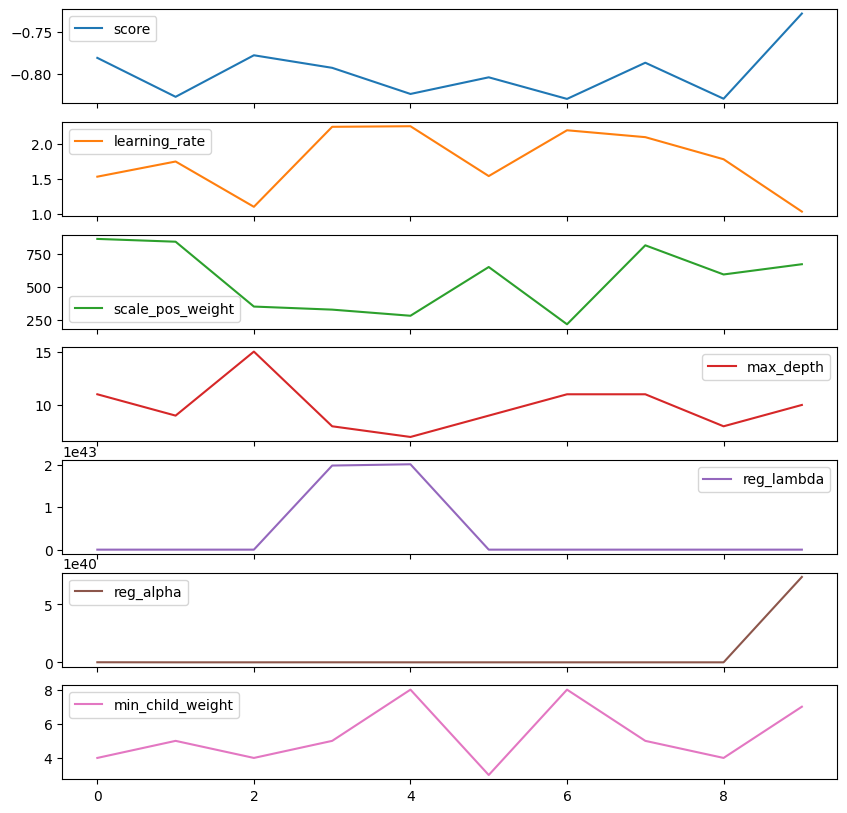

In [56]:
tpe_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['learning_rate'][0],
                       x['misc']['vals']['scale_pos_weight'][0],
                      x['misc']['vals']['max_depth'][0],
                      # x['misc']['vals']['subsample'][0],
                       x['misc']['vals']['reg_lambda'][0],
                       x['misc']['vals']['reg_alpha'][0],
                       x['misc']['vals']['min_child_weight'][0]
                      ] for x in trials.trials])

tpe_results_df=pd.DataFrame(tpe_results,
                           columns=['score', 
                                    'learning_rate', 
                                    'scale_pos_weight', 
                                    'max_depth', 
                                    # 'subsample', 
                                    'reg_lambda', 
                                    'reg_alpha',
                                    'min_child_weight'])
tpe_results_df.plot(subplots=True,figsize=(10, 10))

In [57]:
best_t = best.copy()
best_t['max_depth'] = int(best['max_depth'])
# best_t['n_estimators'] = int(best['n_estimators'])
# best_t['subsample'] = np.log(best['subsample'])
best_t['learning_rate'] = np.log(best['learning_rate'])
best_t['reg_lambda'] = np.log(best['reg_lambda'])
best_t['reg_alpha'] = np.log(best['reg_alpha'])
best_t['min_child_weight'] = int(best['min_child_weight'])
best_t['scale_pos_weight'] = int(best['scale_pos_weight'])
best_t

{'learning_rate': np.float64(0.7875284163458045),
 'max_depth': 11,
 'min_child_weight': 8,
 'reg_alpha': np.float64(3.295527441180817),
 'reg_lambda': np.float64(86.40344838748092),
 'scale_pos_weight': 219}

In [58]:
# generate cross validation predictions for training data
print('[Optimised Train Results]')

model_opt = xgb.XGBClassifier(eval_metric=average_precision_score, booster='gbtree', random_state=10, **best_t)

[Optimised Train Results]


[Optimised Train Results]


,Mean,STD,Median
accuracy,0.999480,0.000102,0.999471
precision,0.868212,0.051226,0.882353
recall,0.814936,0.032766,0.815789
f1,0.839588,0.029177,0.837719
average_precision,0.828986,0.037005,0.819356


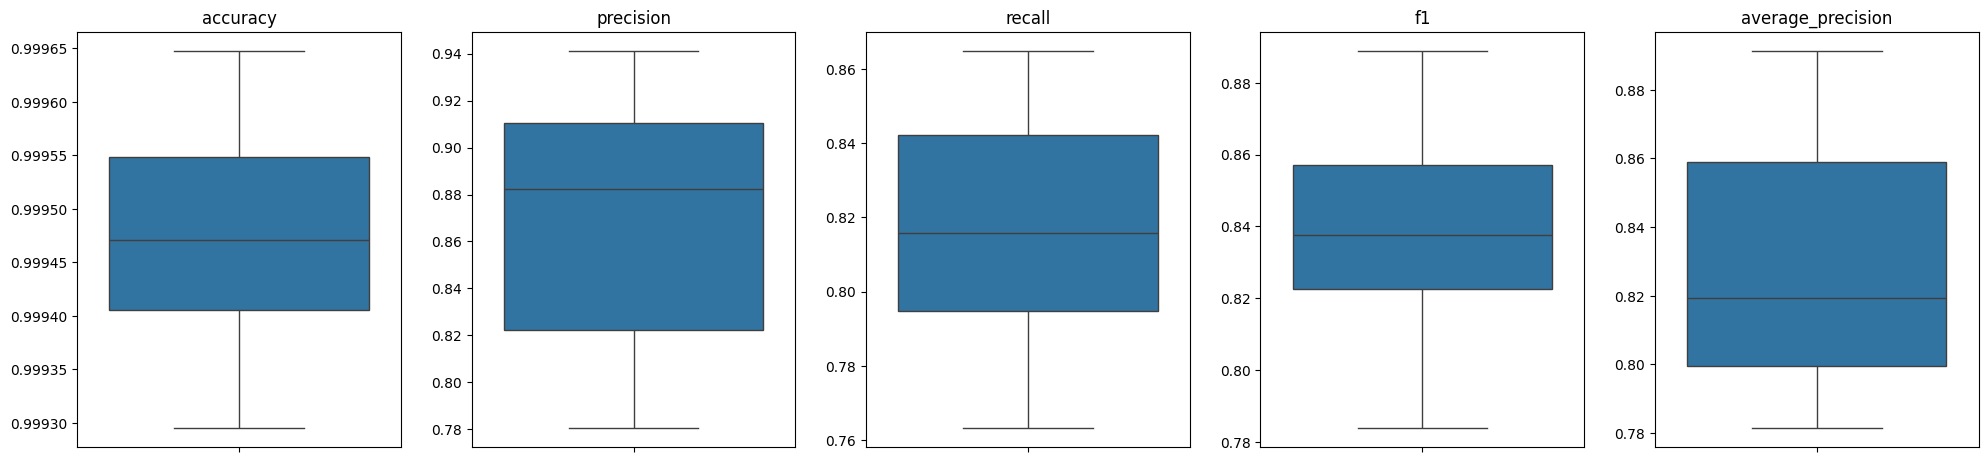

In [59]:
# generate cross validation predictions for training data
y_cv_opt_probs = cross_val_predict(model_opt, X_train, y_train, cv=cv, method='predict_proba')[:,1]
y_cv_opt_preds = (y_cv_opt_probs >= 0.5).astype(int)

print('[Optimised Train Results]')
evaluate_cv_predictions(X_train, y_train, model_opt)

In [60]:
for th in range(1,11):
    th = th / 10
    y_pred_th = (y_cv_opt_probs > th).astype(int)
    acc = accuracy_score(y_train, y_pred_th)
    prec = precision_score(y_train, y_pred_th)
    rec = recall_score(y_train, y_pred_th)
    f1 = f1_score(y_train,y_pred_th)
    print(f"Threshold: {th} - Acc: {acc}; Precision: {prec}; Recall: {rec}; F1: {f1}")

Threshold: 0.1 - Acc: 0.998920609745352; Precision: 0.6338028169014085; Recall: 0.8333333333333334; F1: 0.72
Threshold: 0.2 - Acc: 0.9992466296590008; Precision: 0.7482014388489209; Recall: 0.8253968253968254; F1: 0.7849056603773585
Threshold: 0.3 - Acc: 0.9993920169177901; Precision: 0.8125; Recall: 0.8253968253968254; F1: 0.8188976377952756
Threshold: 0.4 - Acc: 0.9994360736628778; Precision: 0.8415300546448088; Recall: 0.8148148148148148; F1: 0.8279569892473119
Threshold: 0.5 - Acc: 0.9994801304079655; Precision: 0.8651685393258427; Recall: 0.8148148148148148; F1: 0.8392370572207084
Threshold: 0.6 - Acc: 0.9994977531060005; Precision: 0.8837209302325582; Recall: 0.8042328042328042; F1: 0.8421052631578947
Threshold: 0.7 - Acc: 0.9994977531060005; Precision: 0.8928571428571429; Recall: 0.7936507936507936; F1: 0.8403361344537815
Threshold: 0.8 - Acc: 0.9995153758040356; Precision: 0.9085365853658537; Recall: 0.7883597883597884; F1: 0.8441926345609065
Threshold: 0.9 - Acc: 0.99953740417

Confusion Matrix - Optimised Params


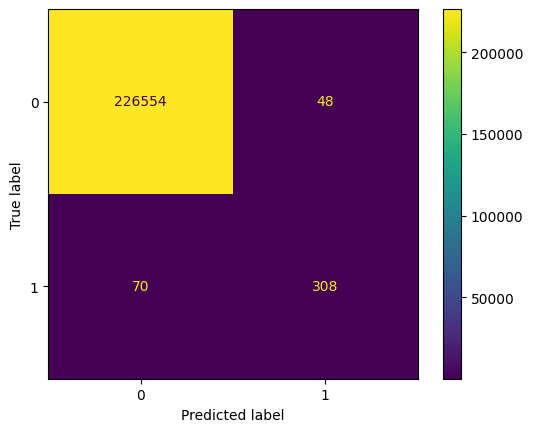

In [61]:
print('Confusion Matrix - Optimised Params')
plot_confusion_matrix(y_actuals=y_train, y_preds=y_cv_opt_preds)

AUCPR Curves - Optimised Params
AUCPR score: 0.8257


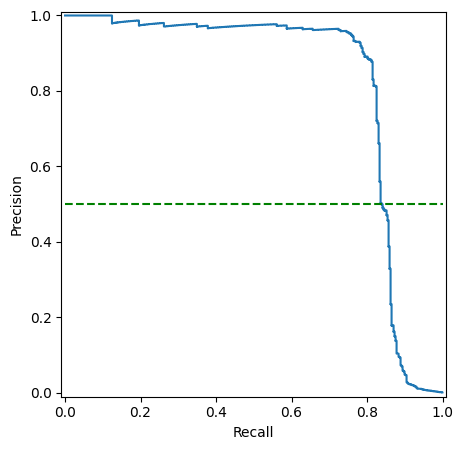

In [62]:
print('AUCPR Curves - Optimised Params')
plot_prauc_curve(y_actuals=y_train, y_probs=y_cv_opt_probs)

In conclusion, the test evaluations, after hyperparameter tuning as well as classification threshold tuning, show that the model is able to properly distinguish between the two classes, for unseen data. Given that it has satisfied the business requirements, strong considerations to deploy is recommended.

### 11. Predict Test Set Probabilities

,Mean,STD,Median
accuracy,0.999260,0.000313,0.999207
precision,0.748194,0.102716,0.738636
recall,0.862222,0.137634,0.844444
f1,0.793454,0.094023,0.784615
average_precision,0.859435,0.127809,0.855196


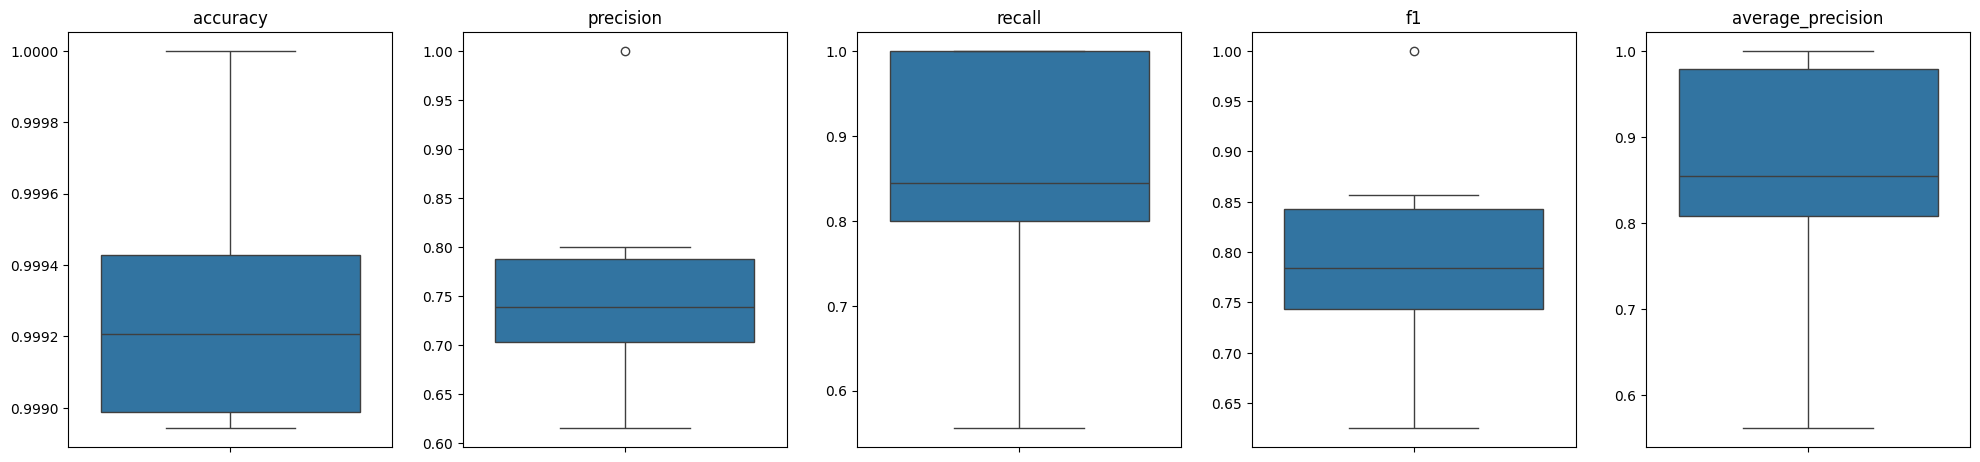

In [63]:
# computing the score on the test set
evaluate_cv_predictions(X_test, y_test, model_opt)

In [64]:
y_cv_test_probs = cross_val_predict(model_opt, X_test, y_test, cv=cv, method='predict_proba')[:,1]
y_cv_test_preds = (y_cv_test_probs >= 0.5).astype(int)

Confusion Matrix - Optimised Params


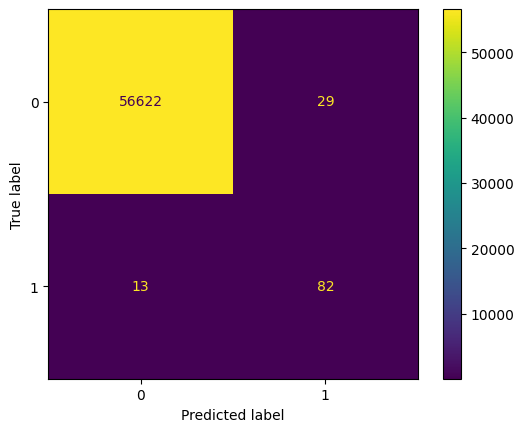

In [65]:
print('Confusion Matrix - Optimised Params')
plot_confusion_matrix(y_actuals=y_test, y_preds=y_cv_test_preds)

AUCPR Curves - Optimised Params
AUCPR score: 0.8539


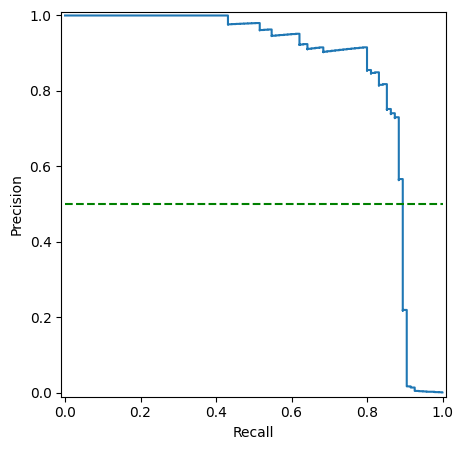

In [66]:
print('AUCPR Curves - Optimised Params')
plot_prauc_curve(y_actuals=y_test, y_probs=y_cv_test_probs)

### 12. Feature Importance

In [67]:
import shap

In [68]:
explainer = shap.TreeExplainer(model_opt.fit(X_train, y_train))
shap_values = explainer.shap_values(X_test)

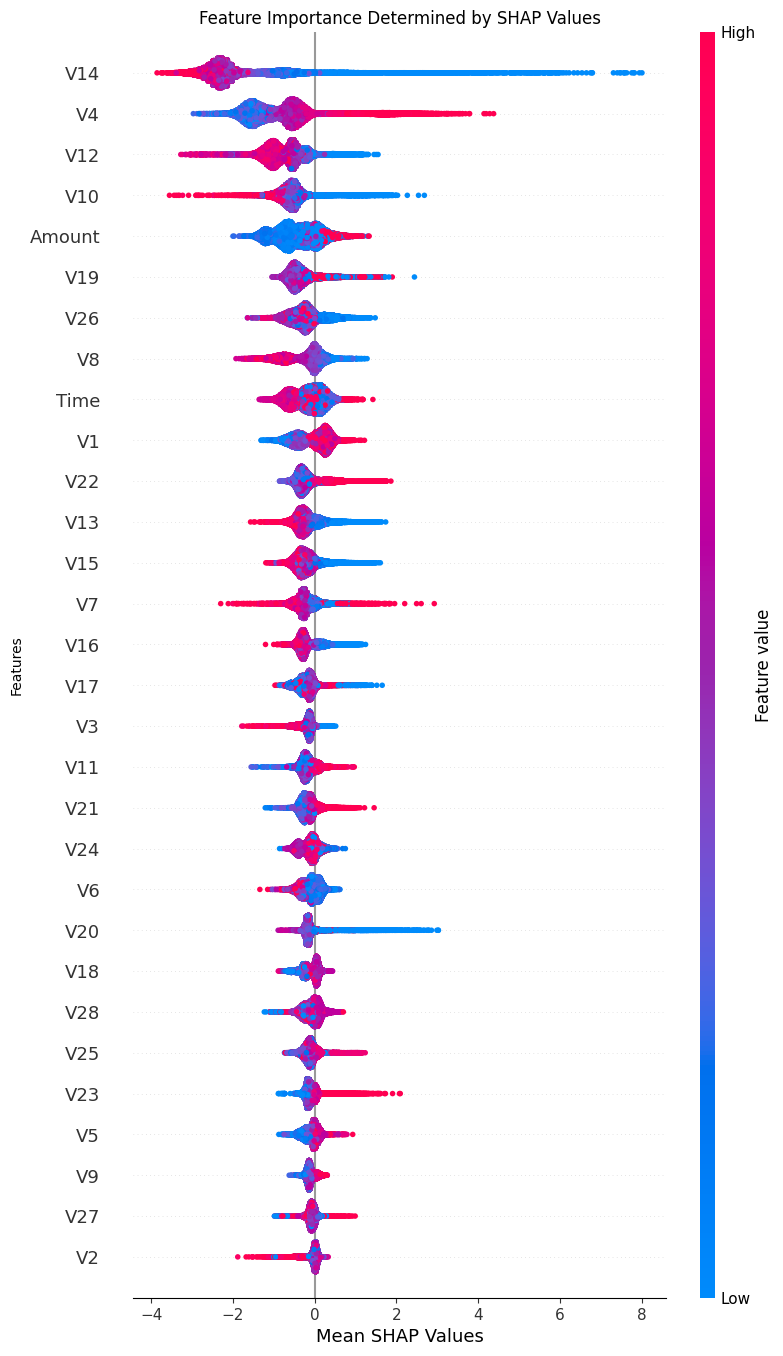

In [69]:
fig = shap.summary_plot(shap_values, X_test, show=False, class_names=['High Adapativity','Moderate Adaptivity', 'Low Adaptivity'], max_display = len(X_test.columns))
plt.title('Feature Importance Determined by SHAP Values')
plt.xlabel('Mean SHAP Values')
plt.ylabel('Features')
plt.show()

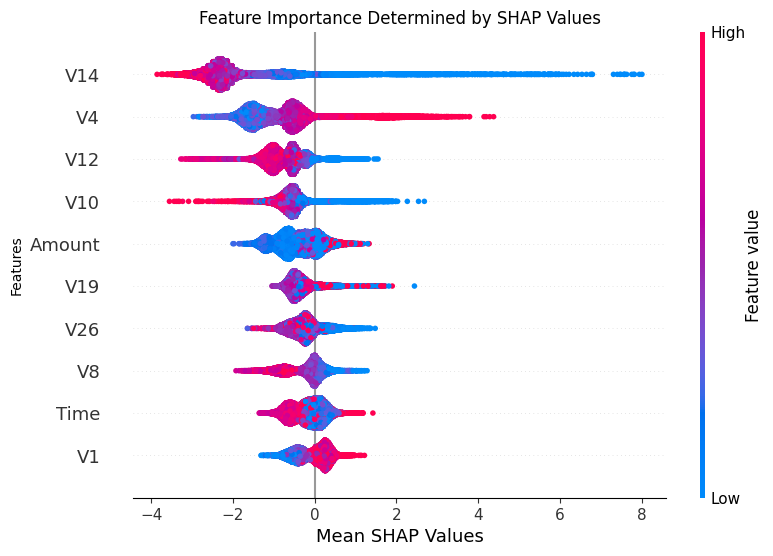

In [70]:
fig = shap.summary_plot(shap_values, X_test, show=False, class_names=['High Adapativity','Moderate Adaptivity', 'Low Adaptivity'], max_display = 10)
plt.title('Feature Importance Determined by SHAP Values')
plt.xlabel('Mean SHAP Values')
plt.ylabel('Features')
plt.show()

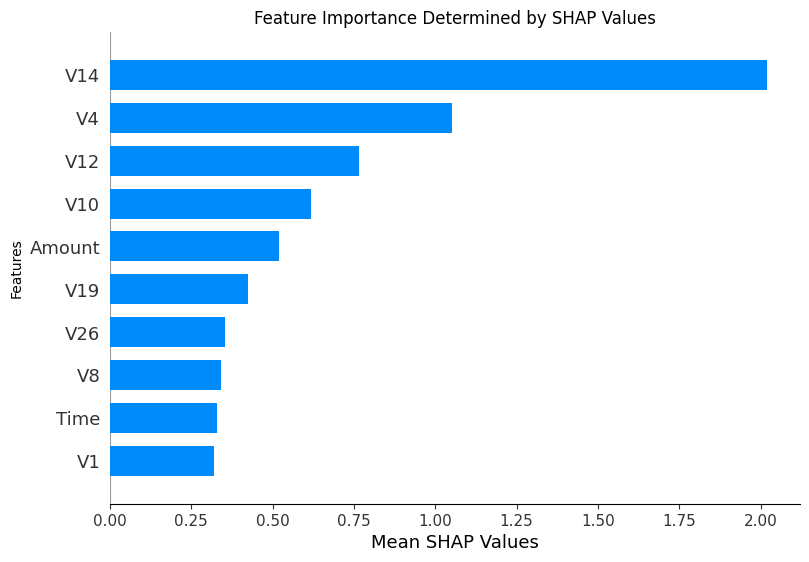

In [71]:
fig = shap.summary_plot(shap_values, X_test, show=False, class_names=['High Adapativity','Moderate Adaptivity', 'Low Adaptivity'], max_display = 10, plot_type='bar')
plt.title('Feature Importance Determined by SHAP Values')
plt.xlabel('Mean SHAP Values')
plt.ylabel('Features')
plt.show()